In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problem 1

If we consider the differential charge as $dq=\sigma R^{2} \sin{\theta}d\theta d\phi$ and the absolute square distance as $r^{2}=R^{2}+z^{2}-2Rz\cos{\theta}$ because we are calculating the electric field along the direction $\hat{z}$, we can set up the following integral for obtain $E_{z}$:

$$E_{z}=\frac{1}{4\pi \epsilon_{0}}\int_{0}^{\pi} \frac{\sigma R^{2}\sin{\theta}d\theta d\phi(z-R\cos{\theta})}{(R^{2}+z^{2}-2Rz\cos{\theta}))^{3/2}} $$

Then, the integral of $\phi$ is equal to $2\pi$ and we can use the following change of variable $u=\cos{\theta}$; $du=-\sin{\theta}d\theta$. And the new expression is:

$$E_{z}=\frac{1}{2 \epsilon_{0}}\int_{-1}^{1} \frac{\sigma R^{2} (z-Ru)du}{(R^{2}+z^{2}-2Rzu)^{3/2}} $$

Let's define $R=2$ $\sigma=1$, and $\epsilon_{0}=1$ for simplicity

In [3]:
R=2
sigma=1
e0=1

Defining z and u

In [4]:
z=np.linspace(0,4,501)
u=np.linspace(-1,1,500000)

I used the Simpson's rule to integrate along u divided on 500000 intervals, then I did the integral 501 times for every z and I obatined $E_{z}(z)$

In [8]:
h=(1-(-1))/len(u) #equivalen to dx
w=h/3 # for Simpson's rule
k=(R**2)*sigma/(2*np.pi*e0)

In [6]:
def fint(z,u):
    return (z-R*u)/(((R**2)+(z**2)-(2*R*z*u))**(3/2))

In [7]:
Ez=[]
for i in z:
    itg=(fint(i,u[0])+fint(i,u[-1])+4*sum(fint(i,u[1::2]))+2*sum(fint(i,u[2:-1:2])))*w
    Ez.append(itg)

C:\Users\Odette\AppData\Local\Temp\ipykernel_9204\3029293887.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (z-R*u)/(((R**2)+(z**2)-(2*R*z*u))**(3/2))
C:\Users\Odette\AppData\Local\Temp\ipykernel_9204\3029293887.py:2: RuntimeWarning: invalid value encountered in true_divide
  return (z-R*u)/(((R**2)+(z**2)-(2*R*z*u))**(3/2))


We can see that there is an invalid value when calculating $E_{z}$. Let's see the plot:

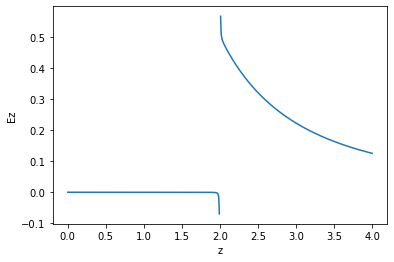

In [11]:
plt.plot(z,Ez)
plt.xlabel('z')
plt.ylabel('Ez')
plt.show()

There is discontinuity at $z=R=2$. Let's try with scipy.integrate.quad

In [12]:
Ezz=[]
for i in z:
    f=lambda x: fint(i,x)
    itg=quad(f,-1,1)[0] 
    Ezz.append(itg)


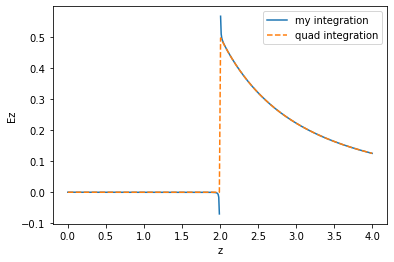

In [22]:
plt.plot(z,Ez,label='my integration')
plt.plot(z,Ezz,'--',label='quad integration')
plt.xlabel('z')
plt.ylabel('Ez')
plt.legend()
plt.show()

We can see that quad defined a value for $z=2$. so I'm going to define a routine that does not evaluate the integral when $z$ is close to $2$.

In [26]:
def integration(z):
    Ezl=[]
    ind=[]
    for i in range(len(z)):
        if R-4/500<=z[i]<=R+4/500: #z[i]==R:
            print("Singularity at z=R")
            ind.append(i)
            continue
        else:  
            itg=(fint(z[i],u[0])+fint(z[i],u[-1])+4*sum(fint(z[i],u[1::2]))+2*sum(fint(z[i],u[2:-1:2])))*w
            Ezl.append(itg)
    print(ind)
    return np.array(list(z[0:ind[0]])+list(z[ind[-1]+1::])),np.array(Ezl)

In [27]:
zz,intt=integration(z)

Singularity at z=R
Singularity at z=R
Singularity at z=R
[249, 250, 251]


Now my $E_{z}$ looks better.

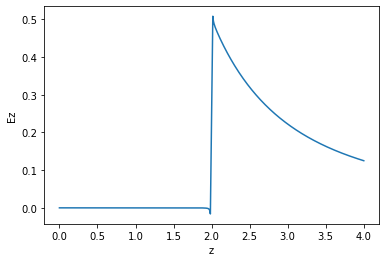

In [28]:
plt.plot(zz,intt)
plt.xlabel('z')
plt.ylabel('Ez')
plt.show()

# Problem 3
(Problem 2 is after Problem 3)

I defined $n$ points to make the fit with the Chebyshev polynomials to $\log_{
2}$

In [30]:
n=31

In [31]:
xx=np.linspace(0.5,1,n)
yy=np.log2(xx)

Since Chebyshev polynomials are defined for $\in[-1,1]$ for Domain and Range, we must change our variables. First $0.5<x<1$, so I defined $-1<u=4x-3<1$. And I used $-1<v=2y+1<1$ for$-1<y=f(x)<0$.    

In [32]:
uu=4*xx-3
vv=2*yy+1

In [33]:
uu

array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
       -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
       -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
        0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
        0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
        1.        ])

In [34]:
vv

array([-1.        , -0.90538857, -0.81378119, -0.72499295, -0.63885551,
       -0.55521516, -0.47393119, -0.39487446, -0.31792616, -0.24297675,
       -0.169925  , -0.09867718, -0.02914635,  0.03874832,  0.10508205,
        0.169925  ,  0.23334272,  0.29539651,  0.35614381,  0.4156385 ,
        0.47393119,  0.53106949,  0.58709825,  0.64205972,  0.69599381,
        0.74893824,  0.80092865,  0.85199884,  0.9021808 ,  0.95150491,
        1.        ])

mat is the Matrix for the u evaluated in the polynomials until grade $n-1$

In [37]:
mat=np.polynomial.chebyshev.chebvander(uu,n-1)

fitp is the inverse of mat multiplied by v to obtain the coefficients for the polynomial fit.

In [38]:
fitp=np.linalg.inv(mat)@vv

In [39]:
fitp #some coefficients could be 0

array([ 8.62132127e-02,  9.90109345e-01, -8.49379535e-02,  9.71536589e-03,
       -1.25016982e-03,  1.71596153e-04, -2.45343035e-05,  3.60806644e-06,
       -5.41660484e-07,  8.26344149e-08, -1.27856765e-08,  2.00816430e-09,
       -3.67435860e-10,  9.18589649e-11, -1.01863407e-10,  4.72937245e-11,
       -8.00355338e-11,  3.54702934e-11, -5.82076609e-11,  2.54658516e-11,
       -4.00177669e-11,  1.36424205e-11, -2.00088834e-11,  5.45696821e-12,
       -2.72848411e-12,  9.09494702e-13,  2.27373675e-13,  1.70530257e-13,
        2.84217094e-13,  2.48689958e-14,  4.97379915e-14])

I took until coefficient of index 7 to be significant for this fit, so the others were turned to 0.

In [40]:
fitp[8:]=0

In [41]:
fitp

array([ 8.62132127e-02,  9.90109345e-01, -8.49379535e-02,  9.71536589e-03,
       -1.25016982e-03,  1.71596153e-04, -2.45343035e-05,  3.60806644e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

predv is the prediction for v using the polynomial fit.

In [42]:
predv=mat@fitp

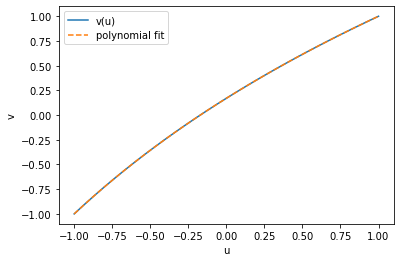

In [45]:
plt.plot(uu,vv,label='v(u)')
plt.plot(uu,predv,'--',label='polynomial fit')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.show()

And the absolute error, which $<10^{6}$

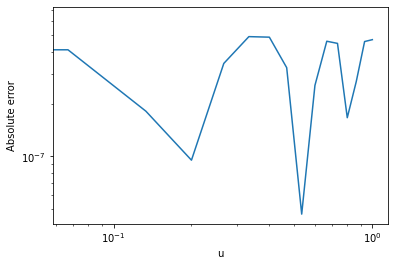

In [46]:
plt.loglog(uu,np.abs(vv-predv))
plt.xlabel('u')
plt.ylabel('Absolute error')
plt.show()

And I returned to $y=f(x)=v/2-1/2$ to see how the prediction work for the original variables.

In [48]:
predy=(predv-1)/2

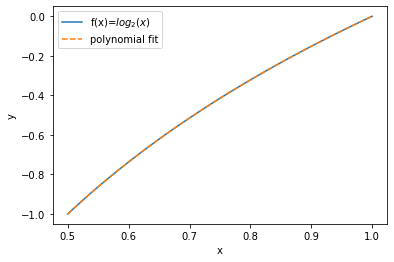

In [50]:
plt.plot(xx,yy,label='f(x)=$log_{2}(x)$')
plt.plot(xx,predy,'--',label='polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The error remains the expected values

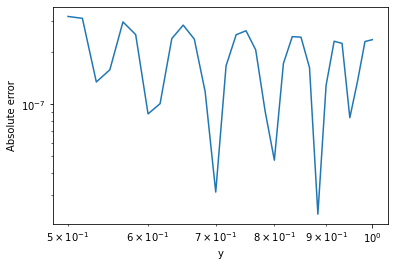

In [51]:
plt.loglog(xx,np.abs(yy-predy))
plt.xlabel('y')
plt.ylabel('Absolute error')
plt.show()

I defined the routine log to estimate the natural log from the $log_{2}$ polynomial fit. Using np.frexp the variable x is separated in m and n, then $x=m2^{n}$. The m of the mantissa $\in[0.5,1]$ for positive x, then I used the polynomial fit that I did before to compute the natural log as follows:
$$\ln{x}=\frac{\log_{2}(m)+n}{\log_{2}(e_{m})+e_{n}}$$
Where $e_{m},e_{n}$ are the mantissa-exponent component of the Euler's number.

In [53]:
def log(x):
    m,n=np.frexp(x)
    u=4*m-3
    v=np.polynomial.chebyshev.chebval(u,fitp)
    log2_m=(v-1)/2
    
    me,ne=np.frexp(np.e)
    ue=(4*me)-3
    ve=np.polynomial.chebyshev.chebval(ue,fitp)
    log2_me=(ve-1)/2
    
    return (log2_m+n)/(log2_me+ne)

I can compare it for a few values

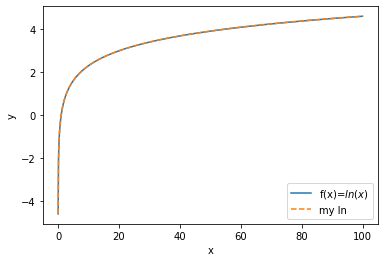

In [55]:
xt=np.linspace(0.01,100,1001)
plt.plot(xt,np.log(xt),label='f(x)=$ln(x)$')
plt.plot(xt,log(xt),'--',label='my ln')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [56]:
log(100),np.log(100)

(4.60517073605484, 4.605170185988092)

In [57]:
log(0.04),np.log(0.04)

(-3.218876343760675, -3.2188758248682006)

# Problem 2

I wrote a recursive stepsize integrator that does not compute $f(x)$ for the same $x$ two time. Then the routine starts with extra=None and calculate the integral using the trapezoid method=i1 and the Simpson's rule=2 for 5 points. Then compare the absolute error between i1 and i2, if it is lower than the tolerance it returns i2. But if tolerance < error, the routine adds to extra all the $f(x)$ that we computed before as well as n and e which are used to do the following iteration, then if we start with 5 points for x, now the routine adds 1 point for every interval, then we have 9 points now, since the routine saved the previous $f(x)$ it only computes $f(x)$ for the extra points; the Integral is estimated with the trapezoid and Simpson's rule again using the old and the new points and the error is compared with the tolerance, the process is repeated until we have a lower error than the tolerance. In each iteration we will have $r=n+2^{e}$ terms in the sumation that estimate the integral, were $n$ is the amount of data points in the previous iteration and $e$ the exponent that is 2 for 9 pints, 3 for the following iteration, then 4, etc.    

In [61]:
def integrate(fun,a,b,tol,extra=None):
    print('call')
    if extra==None:
        #extra=[]
        x=np.linspace(a,b,5)
        dx=x[1]-x[0]
        y=fun(x)
    
        i1=(0.5*y[0]+(y[1]+y[2]+y[3])+0.5*y[4])*dx
        i2=dx*(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3
        n=len(x)
        e=2
        extra=[y,n,e]
        myerr=np.abs(i1-i2)
        #print(i2)
        if myerr<tol:
            extra=0
            return print('Integral: '+str(i2)+', Error:'+str(myerr))
        else:
            integrate(fun,a,b,tol,extra)
        
    else:
        n=extra[1]
        e=extra[2]
        x2=np.linspace(a,b,int(n+2**e))[1::2] 
        y1=extra[0]
        y2=list(fun(np.array(x2))) #I do not use the same x as before
                            #I just compute f(x) for the new point and 
                            #add the old points in extra when doing the sumation 
       
        y=np.zeros(n+2**e)
        p=0
        c=0
    
        for i in range(0,len(y),2):
            y[i]=y1[c]
            c+=1
        for i in range(1,len(y)-1,2):
            y[i]=y2[p]
            p+=1
            
        dx=x2[0]-a 
        i1=0.5*(y[0]+y[-1])*dx+sum(y[1:-1])*dx
        i2=(y[0]+y[-1]+4*sum(y[1::2])+2*sum(y[2:-1:2]))*dx/3 #Simpson
        myerr=np.abs(i1-i2)
        
        if myerr<tol:
            return print('Integral: '+str(i2)+', Error:'+str(myerr))
        else:
            n=len(y)
            e+=1
            extra=[y,n,e]
            integrate(fun,a,b,tol,extra)

Let's test the routine and compare with the routine of the class that I renamed as integrate2:
$$\int_{1}^{2} \ln{x}dx$$

In [62]:
integrate(np.log,1,2,10**-7,extra=None)

call
call
call
call
call
call
call
call
call
Integral: 0.38629436111988164, Error:3.973641882204504e-08


It took  9 calls to estimate the integral with tolerance less than $10^{7}$

In [63]:
def integrate2(fun,a,b,tol):
    print('calling function from ',a,b)
    x=np.linspace(a,b,5)
    dx=x[1]-x[0]
    y=fun(x)
    #do the 3-point integral
    i1=(y[0]+4*y[2]+y[4])/3*(2*dx)
    i2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx
    myerr=np.abs(i1-i2)
    if myerr<tol:
        return i2
    else:
        mid=(a+b)/2
        int1=integrate2(fun,a,mid,tol/2)
        int2=integrate2(fun,mid,b,tol/2)
    
        return int1+int2

In [64]:
integrate2(np.log,1,2,10**-7)

calling function from  1 2
calling function from  1 1.5
calling function from  1 1.25
calling function from  1 1.125
calling function from  1 1.0625
calling function from  1.0625 1.125
calling function from  1.125 1.25
calling function from  1.125 1.1875
calling function from  1.1875 1.25
calling function from  1.25 1.5
calling function from  1.25 1.375
calling function from  1.25 1.3125
calling function from  1.3125 1.375
calling function from  1.375 1.5
calling function from  1.375 1.4375
calling function from  1.4375 1.5
calling function from  1.5 2
calling function from  1.5 1.75
calling function from  1.5 1.625
calling function from  1.625 1.75
calling function from  1.75 2
calling function from  1.75 1.875
calling function from  1.875 2


0.3862943588404081

For the class code it tooks more than 20 calls. Let's do another example

$$\int_{0}^{\pi/2} \sin{x}dx$$

In [65]:
integrate(np.sin,0,np.pi/2,10**-7,extra=None)

call
call
call
call
call
call
call
call
call
call
Integral: 1.0000000000000018, Error:4.902285899444081e-08


In [66]:
integrate2(np.sin,0,np.pi/2,10**-7)

calling function from  0 1.5707963267948966
calling function from  0 0.7853981633974483
calling function from  0 0.39269908169872414
calling function from  0 0.19634954084936207
calling function from  0.19634954084936207 0.39269908169872414
calling function from  0.19634954084936207 0.2945243112740431
calling function from  0.2945243112740431 0.39269908169872414
calling function from  0.39269908169872414 0.7853981633974483
calling function from  0.39269908169872414 0.5890486225480862
calling function from  0.39269908169872414 0.4908738521234052
calling function from  0.4908738521234052 0.5890486225480862
calling function from  0.5890486225480862 0.7853981633974483
calling function from  0.5890486225480862 0.6872233929727672
calling function from  0.6872233929727672 0.7853981633974483
calling function from  0.7853981633974483 1.5707963267948966
calling function from  0.7853981633974483 1.1780972450961724
calling function from  0.7853981633974483 0.9817477042468103
calling function from 

1.0000000025973508

We coputed the integral faster than the routine of the class again.